<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction and Retention Strategy Optimization**

 Customer churn refers to the percentage of customers who stop using a company’s services during a specific period.

# 1. Importing the Dependencies

In [1]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import classification_report

import pickle
warnings.filterwarnings(action="ignore")
%matplotlib inline

## 2. Loading Data and Understanding

In [4]:
# Load the uploaded dataset
customer_churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## DATA CLEANING

In [6]:
# Drop unnesecary columns
customer_churn.drop(columns=['customerID'], inplace=True)

In [7]:
customer_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#printing unique values in all the columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in customer_churn.columns:
    if col not in numerical_features:
      print(col, customer_churn[col].unique())
      print("_"*50)

gender ['Female' 'Male']
__________________________________________________
SeniorCitizen [0 1]
__________________________________________________
Partner ['Yes' 'No']
__________________________________________________
Dependents ['No' 'Yes']
__________________________________________________
PhoneService ['No' 'Yes']
__________________________________________________
MultipleLines ['No phone service' 'No' 'Yes']
__________________________________________________
InternetService ['DSL' 'Fiber optic' 'No']
__________________________________________________
OnlineSecurity ['No' 'Yes' 'No internet service']
__________________________________________________
OnlineBackup ['Yes' 'No' 'No internet service']
__________________________________________________
DeviceProtection ['No' 'Yes' 'No internet service']
__________________________________________________
TechSupport ['No' 'Yes' 'No internet service']
__________________________________________________
StreamingTV ['No' 'Yes' 'No internet 

In [9]:
customer_churn[customer_churn['TotalCharges'] ==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
len(customer_churn[customer_churn['TotalCharges'] ==" "])

11

In [11]:
customer_churn["TotalCharges"] = customer_churn["TotalCharges"].replace({" ": "0.0"})

In [12]:
#Convert TotalCharges to numeric:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [13]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
#checking the distribution of target column
print(customer_churn['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights**
1. Removed customer ID as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the Total Charges column were replaced with 0
4. Class imbalanced identified in the target

## 3. Exploratory Data Analysis (EDA)

In [ ]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Numerical Features Analysis

Understanding the distribution of numerical features

In [ ]:
def plot_histograms(customer_churn, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(customer_churn[column_name], kde=True)
  plt.title(f'Distribution of {column_name}')

  #calculate mean and median used for the columns
  col_mean = customer_churn[column_name].mean()
  col_median = customer_churn[column_name].median()

  #Add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

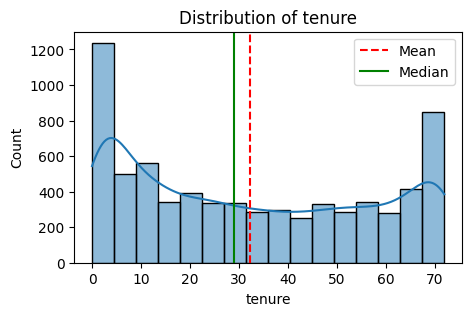

In [ ]:
plot_histograms(customer_churn, "tenure")

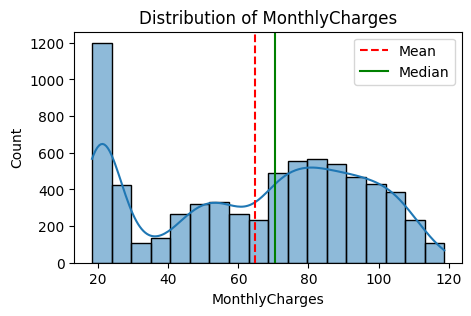

In [ ]:
plot_histograms(customer_churn, "MonthlyCharges")

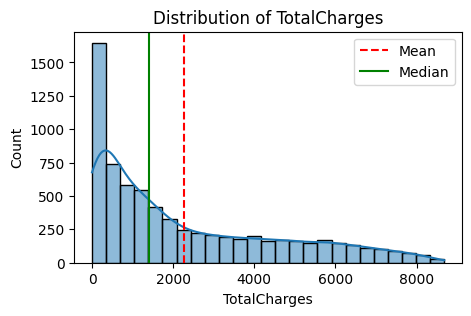

In [ ]:
plot_histograms(customer_churn, "TotalCharges")

### Box plot for numerical columns

In [ ]:
def plot_boxplot(customer_churn, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=customer_churn[column_name])
  plt.title(f'Box Plot of {column_name}')
  plt.ylabel(column_name)
  plt.show()

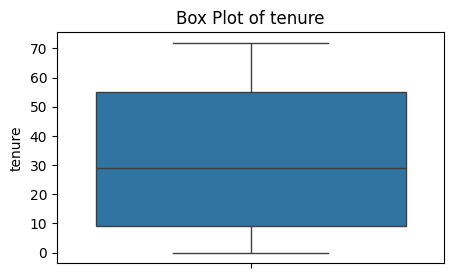

In [ ]:
plot_boxplot(customer_churn, "tenure")

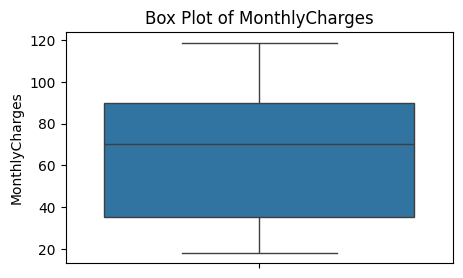

In [ ]:
plot_boxplot(customer_churn, "MonthlyCharges")

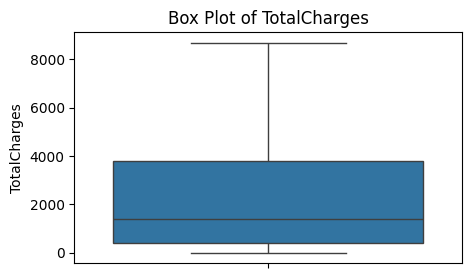

In [ ]:
plot_boxplot(customer_churn, "TotalCharges")

**Correlation heatmap for numerical columns**

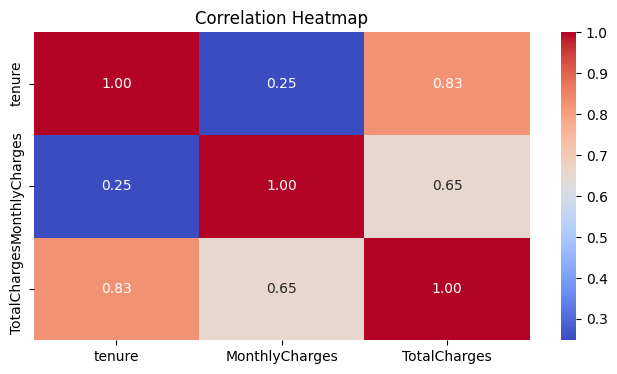

In [ ]:
#Correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(customer_churn[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Categorical Features Analysis**

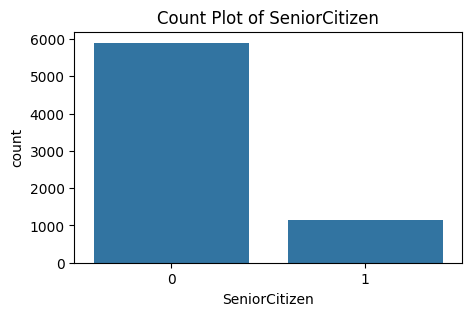

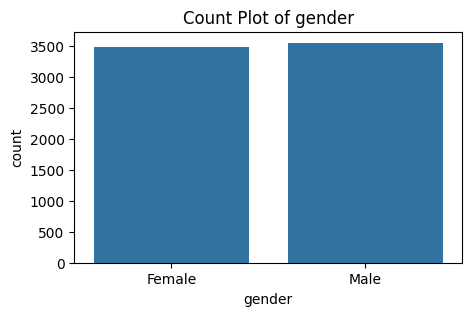

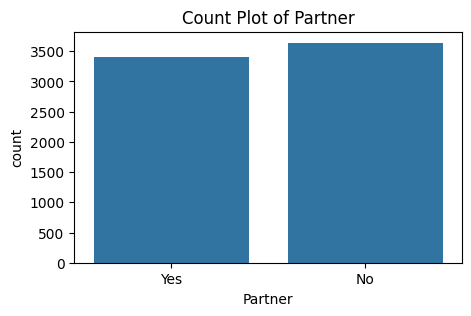

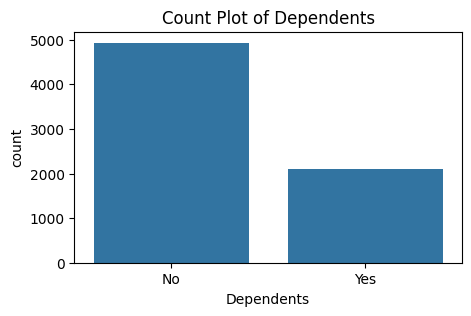

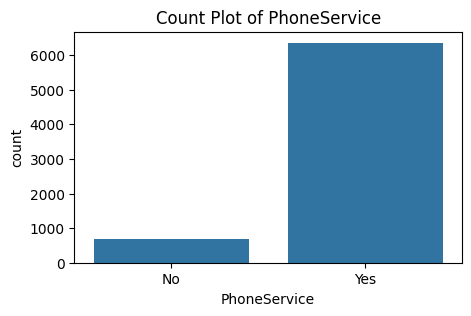

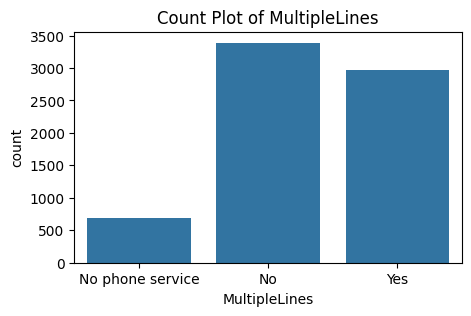

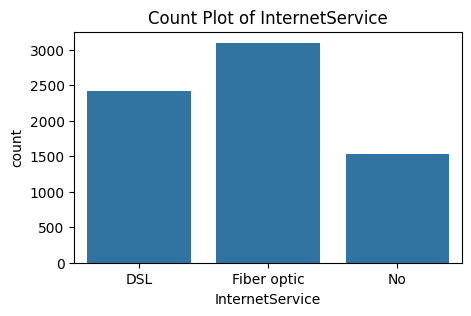

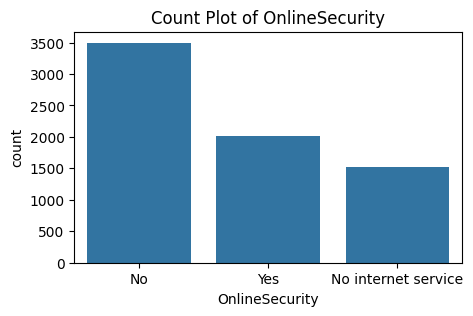

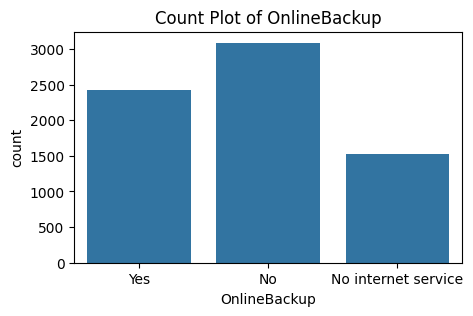

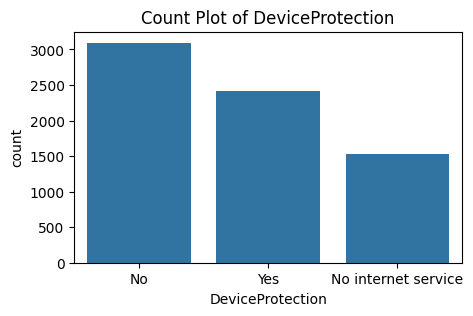

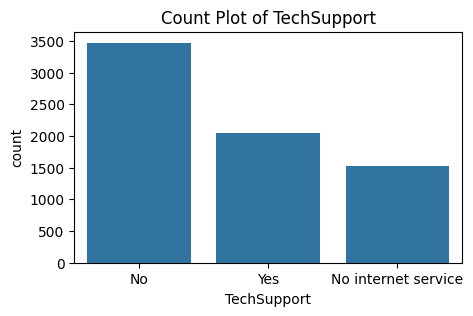

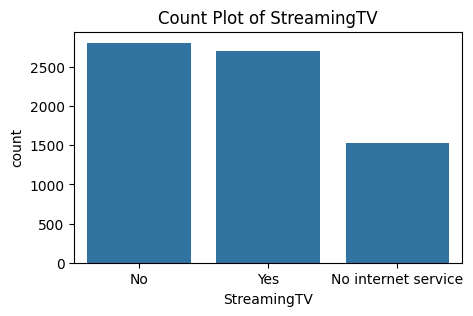

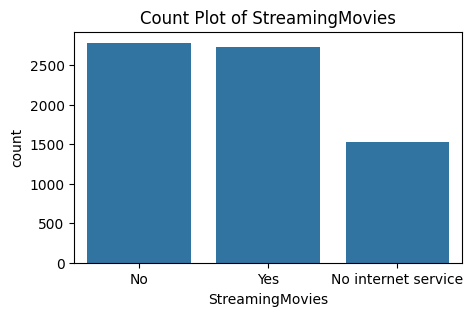

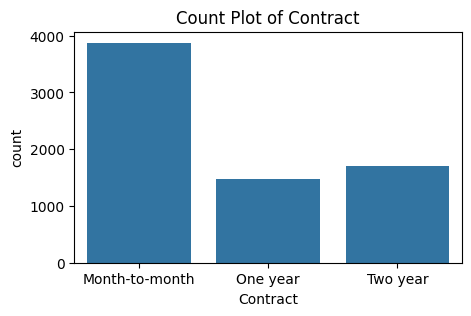

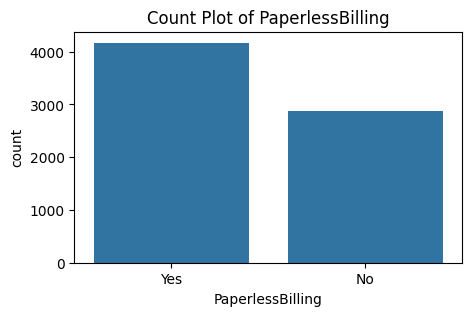

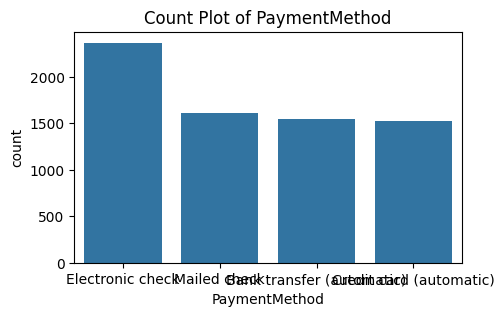

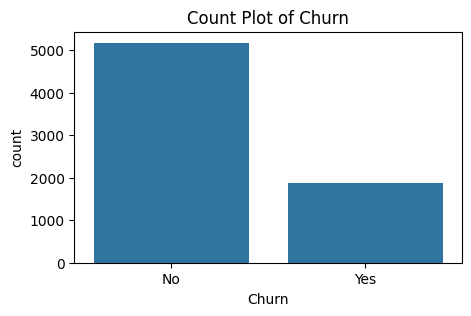

In [ ]:
object_cols = customer_churn.select_dtypes(include=['object']).columns.tolist()
object_cols = ["SeniorCitizen"] + object_cols
# object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=customer_churn[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

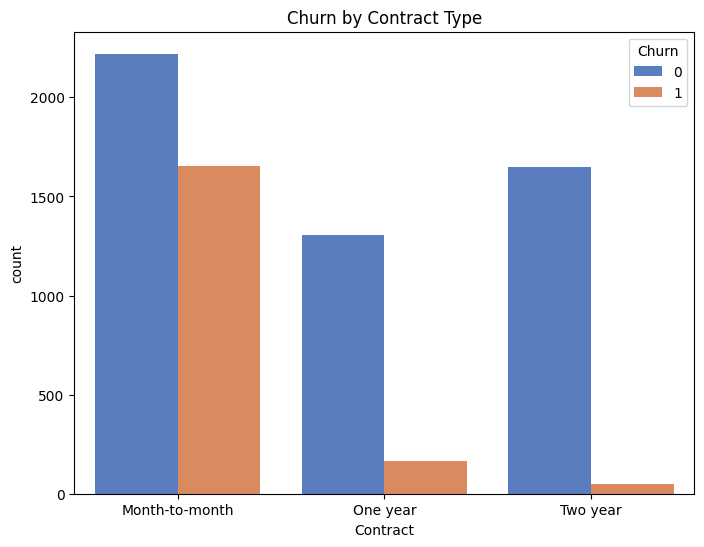

In [42]:
# Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_churn, x='Contract', hue='Churn', palette='muted')
plt.title('Churn by Contract Type')
plt.show()

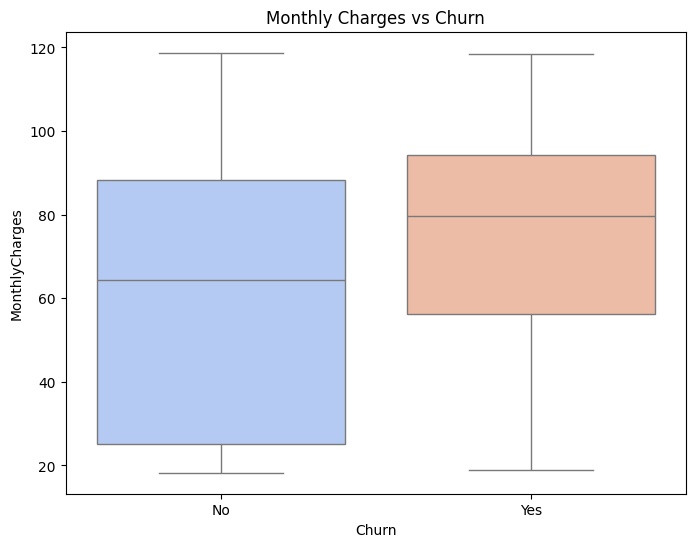

In [ ]:
# MonthlyCharges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_churn, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()

### Pairplot for selected features and the target variable

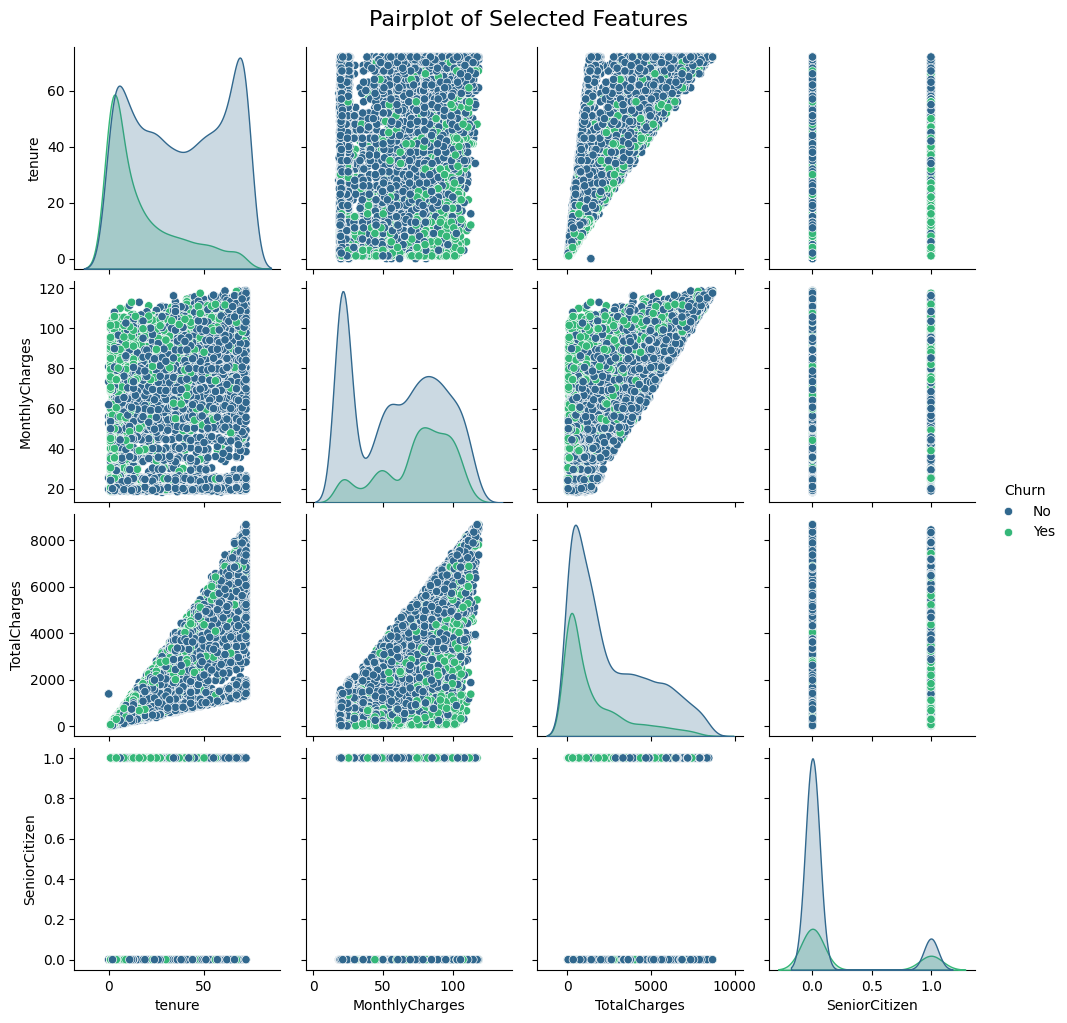

In [ ]:
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents']
sns.pairplot(customer_churn[selected_features + ['Churn']], hue='Churn', palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", fontsize=16, y=1.02)
plt.show()

Churn
0    5174
1    1869
Name: count, dtype: int64


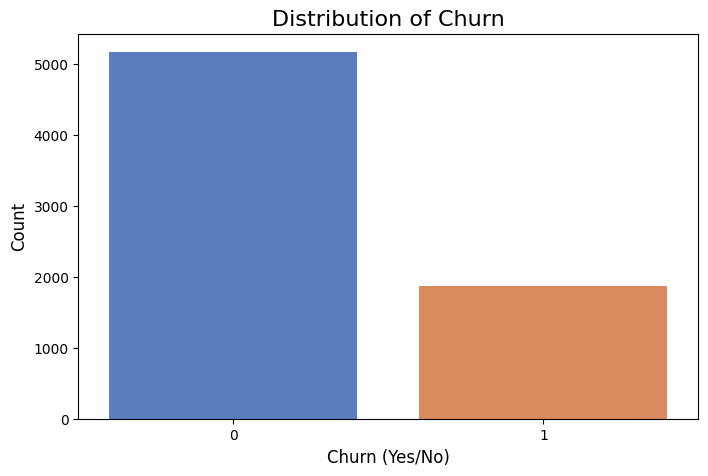

In [45]:
# Check the value counts for the 'Churn' column
churn_counts = customer_churn['Churn'].value_counts()
print(churn_counts)

# Bar plot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_churn, x='Churn', palette="muted")
plt.title("Distribution of Churn", fontsize=16)
plt.xlabel("Churn (Yes/No)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## 4. Data Prepocessing

### Encode Categorical Variables

#### Label encoding for target variable

In [15]:
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes': 1, 'No': 0})

In [16]:
customer_churn['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


#### One-hot encoding for categorical features

In [17]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Apply one-hot encoding
customer_churn_encoded = pd.get_dummies(customer_churn, columns=categorical_cols, drop_first=True)

# Check the data types again
print(customer_churn_encoded.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [18]:
# Convert boolean columns to integers (0 or 1)
customer_churn_encoded = customer_churn_encoded.astype(int)

# Check the data types again to confirm the conversion
print(customer_churn_encoded.dtypes)

SeniorCitizen                            int64
tenure                                   int64
MonthlyCharges                           int64
TotalCharges                             int64
Churn                                    int64
gender_Male                              int64
Partner_Yes                              int64
Dependents_Yes                           int64
PhoneService_Yes                         int64
MultipleLines_No phone service           int64
MultipleLines_Yes                        int64
InternetService_Fiber optic              int64
InternetService_No                       int64
OnlineSecurity_No internet service       int64
OnlineSecurity_Yes                       int64
OnlineBackup_No internet service         int64
OnlineBackup_Yes                         int64
DeviceProtection_No internet service     int64
DeviceProtection_Yes                     int64
TechSupport_No internet service          int64
TechSupport_Yes                          int64
StreamingTV_N

In [19]:
customer_churn_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


###Normalize/Scale Numerical Columns

In [20]:
scaler = StandardScaler()
customer_churn_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(customer_churn_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']])

### **Training and Test Data Split**

In [21]:
#spliting the features and target
X = customer_churn_encoded.drop('Churn', axis=1)
y = customer_churn_encoded['Churn']

In [22]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Verify the shape of the split data
print(f"X_train shape: {X_train.shape}")

X_train shape: (5634, 30)


### Handle Imbalanced Data
 Synthetic Minority Oversampling Technique (SMOTE)

In [24]:
# Step 2: Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## 5. Model Training

In [26]:
# Step 3: Train a Random Forest model on the SMOTE-resampled training data
rf_model = RandomForestClassifier(random_state=42)

In [27]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

random_search.fit(X_train_smote, y_train_smote)

# Get the best model from random search
best_rf_model = random_search.best_estimator_

# Print the best parameters found
print("Best Hyperparameters from Randomized Search:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}


In [28]:
# Step 5: Train the model with the best hyperparameters
best_rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [29]:
# Step 6: Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

## 6. Model Evaluation

In [30]:
# Step 7: Evaluate performance metrics
print("Model Performance with Tuned Hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Performance with Tuned Hyperparameters:
Accuracy: 0.7778566359119943
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1036
           1       0.56      0.74      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



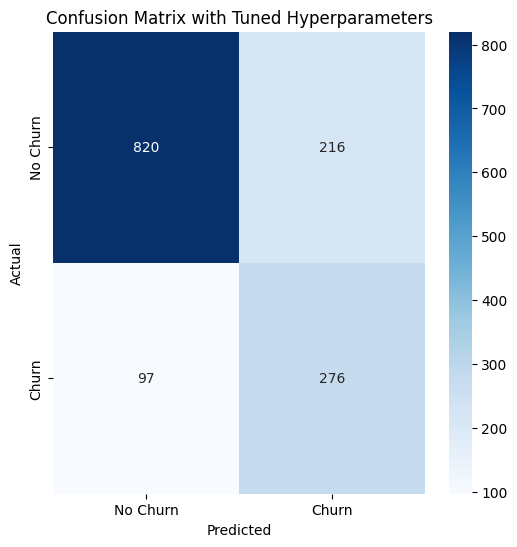

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Tuned Hyperparameters")
plt.show()

ROC-AUC: 0.8532068069601582


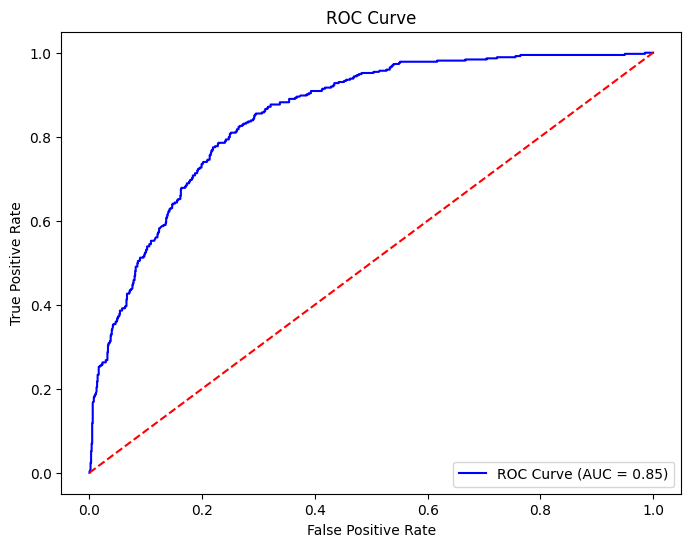

In [32]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Precision-Recall AUC: 0.6643522830737705


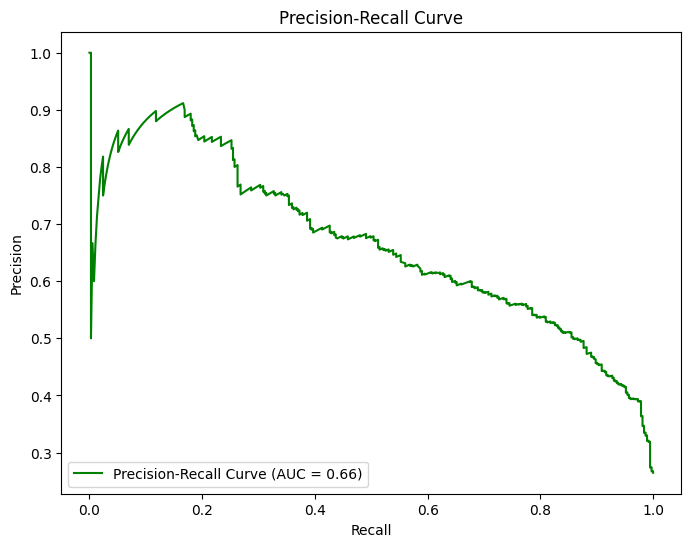

In [33]:
# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [34]:
# Cross-validation for RandomForestClassifier
cv_scores = cross_val_score(best_rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.78864734 0.79214502 0.84108761 0.84229607 0.84652568]
Mean Cross-validation score: 0.8221403447319643


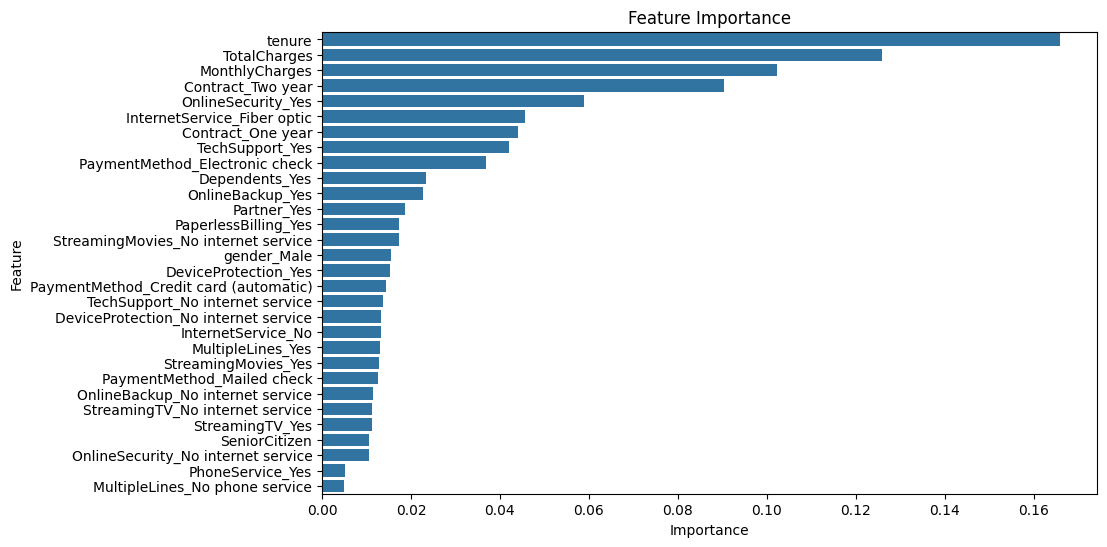

In [37]:
# Plot Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_names = X_train_smote.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [38]:
# Display the feature importance values
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

                                  Feature  Importance
0                                  tenure    0.165960
1                            TotalCharges    0.125813
2                          MonthlyCharges    0.102333
3                       Contract_Two year    0.090273
4                      OnlineSecurity_Yes    0.058996
5             InternetService_Fiber optic    0.045643
6                       Contract_One year    0.044024
7                         TechSupport_Yes    0.041995
8          PaymentMethod_Electronic check    0.036881
9                          Dependents_Yes    0.023314
10                       OnlineBackup_Yes    0.022620
11                            Partner_Yes    0.018747
12                   PaperlessBilling_Yes    0.017339
13    StreamingMovies_No internet service    0.017195
14                            gender_Male    0.015410
15                   DeviceProtection_Yes    0.015333
16  PaymentMethod_Credit card (automatic)    0.014419
17        TechSupport_No int

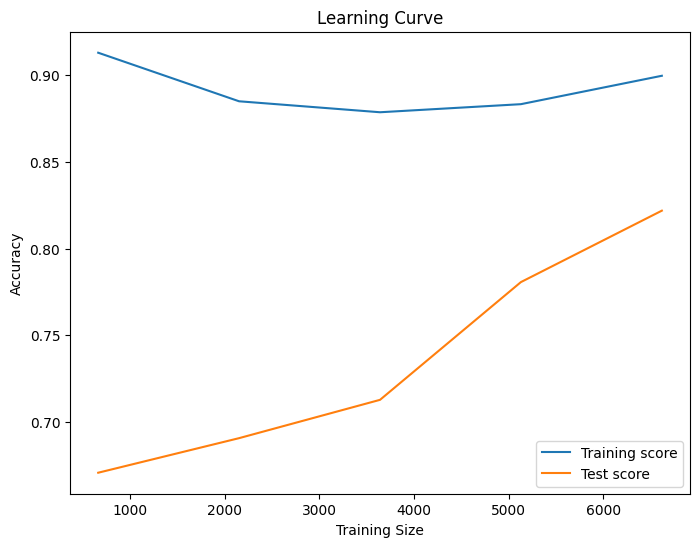

In [35]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)